# Black–Scholes Option Sensitivity Exploration

This notebook reproduces the visualizations requested:

1. **Call price vs. time-to-expiration**  
2. **Call delta vs. spot price**  
3. **Put price vs. time-to-expiration**  
4. **Put delta vs. spot price**  

At the end a short observations section is attached.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Optional style
import seaborn as sns
sns.set_style('darkgrid')

# --- Black‑Scholes pricing ------------------------------------------------
def bs_call(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return S0 * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)

def bs_put(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return -S0 * norm.cdf(-d1) + K * np.exp(-r*t) * norm.cdf(-d2)

def call_delta(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    return norm.cdf(d1)

def put_delta(S0, K, sigma, t=1, r=0):
    return call_delta(S0, K, sigma, t, r) - 1


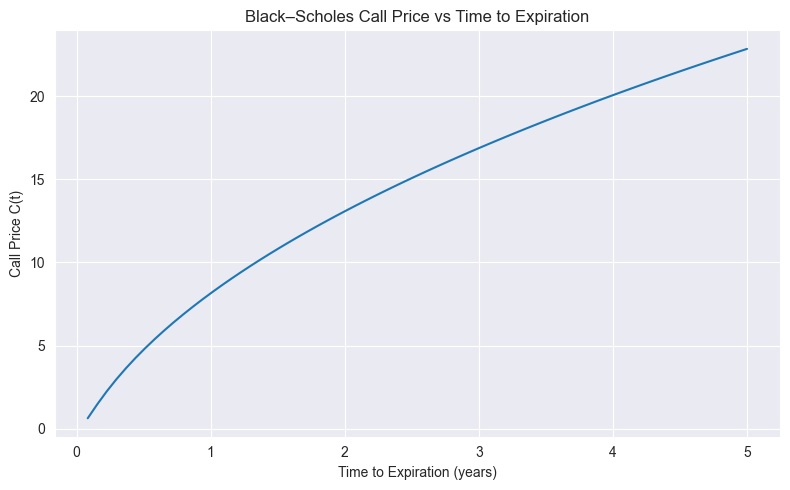

In [3]:
# --- Parameters ---------------------------------------------------------
S0 = 100
K  = 110
sigma = 0.30
times = np.linspace(1/12, 5, 70)

# --- Call price vs time --------------------------------------------------
call_prices = [bs_call(S0, K, sigma, t) for t in times]

plt.figure(figsize=(8,5))
plt.plot(times, call_prices)
plt.title("Black–Scholes Call Price vs Time to Expiration")
plt.xlabel("Time to Expiration (years)")
plt.ylabel("Call Price C(t)")
plt.tight_layout()
plt.show()


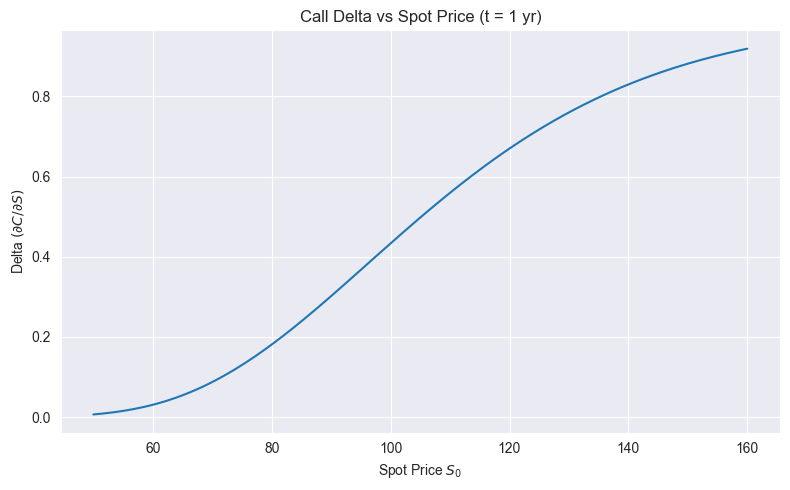

In [4]:
# --- Call delta vs spot price ------------------------------------------
S_range = np.linspace(50, 160, 200)
delta_call = [call_delta(s, K, sigma) for s in S_range]

plt.figure(figsize=(8,5))
plt.plot(S_range, delta_call)
plt.title("Call Delta vs Spot Price (t = 1 yr)")
plt.xlabel("Spot Price $S_0$")
plt.ylabel("Delta $(\partial C/\partial S)$")
plt.tight_layout()
plt.show()


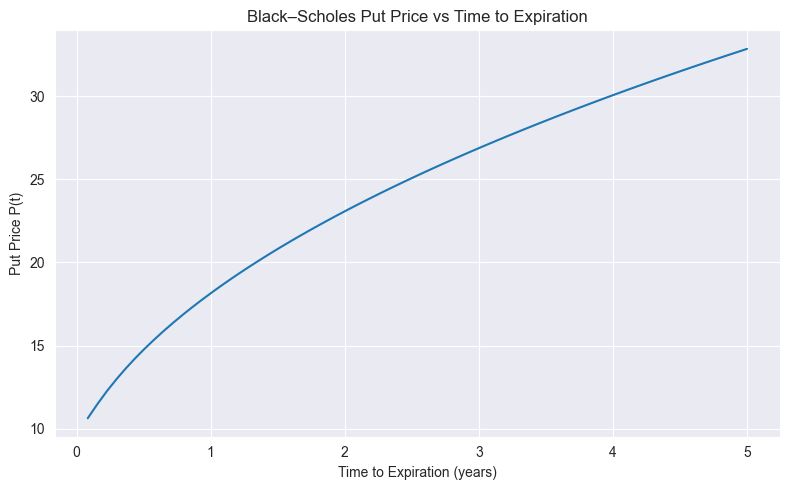

In [5]:
# --- Put price vs time ---------------------------------------------------
put_prices = [bs_put(S0, K, sigma, t) for t in times]

plt.figure(figsize=(8,5))
plt.plot(times, put_prices)
plt.title("Black–Scholes Put Price vs Time to Expiration")
plt.xlabel("Time to Expiration (years)")
plt.ylabel("Put Price P(t)")
plt.tight_layout()
plt.show()


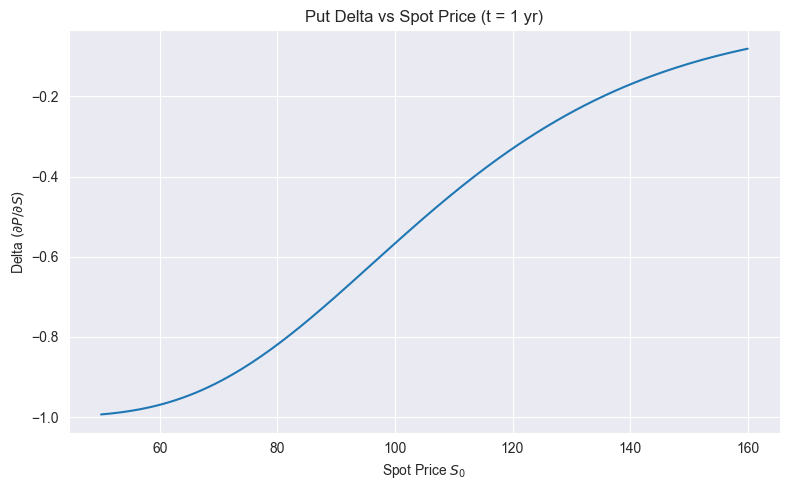

In [6]:
# --- Put delta vs spot price -------------------------------------------
delta_put = [put_delta(s, K, sigma) for s in S_range]

plt.figure(figsize=(8,5))
plt.plot(S_range, delta_put)
plt.title("Put Delta vs Spot Price (t = 1 yr)")
plt.xlabel("Spot Price $S_0$")
plt.ylabel("Delta $(\partial P/\partial S)$")
plt.tight_layout()
plt.show()


## Observations & Reflections

Fill in or adjust the bullet points as you reflect on the plots.

- **Call Option – Time Sensitivity:**  
  For this out‑of‑the‑money call the price climbs rapidly when a lot of time is left, then flattens out as expiration approaches.

- **Call Option – Spot Price Sensitivity:**  
  Δ rises from 0 (deep OTM) through 0.5 (ATM) toward 1 (deep ITM).

- **Put Option – Time Sensitivity:**  
  In‑the‑money put shows large time value that decays toward its intrinsic value \(K - S_0\).

- **Put Option – Spot Price Sensitivity:**  
  Δ starts near –1 (deep ITM) and moves toward 0 as the put slips out of the money.
